#Web Scraping in Python

What is Web Scraping?
<ul>
  <li>In simple terms, web scraping is the process of extracting content and data from a website.</li>
  <li>A form of Data Engineering</li>
  <li>Useful for creating your own datasets to answer your own questions</li>
</ul>

How does web scraping play a role in Data Science?

<img src="http://www.uvm.edu/~cbcafier/assets/pipeline.jpg">

<b>Data Wrangling</b> - The process of restructuring, cleaning, and enriching raw data into a desired format for easy access and analysis.

<b>Data cleansing</b> - The process of prepping data for analysis by amending or removing incorrect, corrupted, improperly formatted, duplicated, irrelevant, or incomplete data within a dataset. 

<b>Explore</b> - Analyze your data to see any trends and/or correlations

<b>Pre-Process</b> - Prepare the data for modeling though processes such as standarization of values, or one-hot-encoding, etc.

<b>Model</b> - Create your model.

<b>Validate</b> - Use different metrics (like ROC, F1, loss, etc.) to see if your model has minial errors.

<b>Tell the Story</b> - Use your model to make decisions

Notice how before anything we need to (1) have a question and then (2) gather our data [via Web Scraping]. 

<br>

<center>
<p style="color:red;"><b>Question - Do large companies in America(specified through market capitalization) have favorable workplace environments for their employees?</b></p> 
</center>

<br>

Now that we have our question we need to gather/create a dataset? But before we can talk about that we need to learn some HTML & CSS:
<ul>
<li>HTML (Hyper Text Markup Language) is a formatting system for displaying material retrieved over the Internet. More specifically, you can structure a webpage using HTML tags which contain HTML atributes. </li>

<li>CSS (Cascading Style Sheets) is used to style and layout web pages.</li>
</ul>
<i>**Lets Do a Very Quick Demo on HTML and CSS Selectors**</i>

<br>
<br>

[SelectorGadget](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb?hl=en)

Now, lets go into web scraping!!



# Install Packages

In [3]:
pip install requests

In [4]:
pip install beautifulsoup4

#Import Libraries


In [7]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

#Example of Useful Methods

Here is a sample html webpage. There are several tags with different attributes. Before we make our own dataset lets see some use Beautiful Soup function!

In [ ]:
html_ex = '''
<html>
    <head>
        <meta lang="eng" charset="UTF-8">
        <link rel="stylesheet" href="style.css">
        <title>UCONN Data Science Club Webpage</title>
    </head>
    <body>
        <h1 id="title">Welcome to UCONN Data Science Club!!!</h1>
        <p class="mission">Mission: To help educate and promote knledge of data science techniques</p>
        <div class="info">
            <p class="p1">Data science is an interdisciplinary field that uses scientific methods, processes, 
            algorithms and systems to extract knowledge and insights within various forms, 
            both structured and unstructured. Data science interacts with a  wide variety of 
            fields: business, finance, biology, artificial intelligence research, and more. 
            Wherever there is data, the techniques and practices of data science will be useful.</p>

            <p class="nested"> UConn Data Science Club focuses on educating and preparing students to be involved 
            in the field of data science. To develop students technical experience, we participate 
            in Kaggle and host workshops focusing on making a wide variety of areas accessible to 
            undergraduate students. These workshops range from introductory coding to machine 
            learning and neural networks which include practical business applications like 
            algorithmic trading and optimization. Our events give members the opportunity to develop 
            professional skills and to network with industry leaders and other students. Each year we 
            host the UConn Sports Analytics Symposium which brings in industry experts and students 
            from across the country.</p>          

            <p class="p3">Currently, we have weekly meetings where we host a workshop followed by hands on sessions. 
            We them release title questions after every meeting where if completed, we issue a 
            certificate at the end of the semester. Our meets cover: NumPy, Matplotlib, Pandas, Scikit-learn, 
            Scipy and TensorFlow.</p>
 
            Join us to learn more!
            </div>

            <div>
                <p>Current Leadership</p>
                <a href="https://www.linkedin.com/in/venkata-patchigolla-0a0a66214">Venkata</a>
                <a href="https://www.linkedin.com/in/alex-h-chen">Alex</a>
                <a href="https://www.linkedin.com/in/pranav-tavildar-b50172208">Pranav</a>
                <a href="https://www.linkedin.com/in/hari-patchigolla-418815216">Hari</a>
            </div>

            <ul class="outreach">
                <li class="l1"><a href="https://discord.gg/KZPfv2CEE5">Discord</a></li>
                <li class="l2">Email: uconndatascience@gmail.com</li>
                <li class="l3"><a href="https://www.instagram.com/uconndatascience/?hl=en">Instagram</a></li>
            </ul>

            <address>
                Written by <a href="mailto:webmaster@example.com">Jon Doe</a>.<br>
                Visit us at:<br>
                Example.com<br>
                Box 564, Disneyland<br>
                USA
            </address>
    </body>
</html>
'''

Next, to scrape information off of our HTML page, we intantiate a BeautifulSoup object. This object represents the parsed document as a whole. So, it is the complete document which we are trying to scrape. 
<br>
<br>
Using the BeautifulSoup object, we can use its attributes and method to obtain specific parts of the HTML page.

In [ ]:
soup = bs(html_ex, 'html.parser') # "html.parser" tells that html_ex is a HTML webpage

The .prettify() mehtod prints out the html page with proper indents

In [ ]:
print(soup.prettify())

In [ ]:
print(type(soup.h1))
soup.h1

A ```Tag``` object corresponds to an HTML tag in the original document. They have **MANY** attibutes and methods but here are a few (click [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#kinds-of-objects) for more information).

Specific tags are attributes in the Beautiful Soup Object:

In [ ]:
soup.h1

In order to obtain the HTML Attributes of a Tag object, you can treat these attributes has a dictionary with the key being the attribute name and the value being the attribute value.

In [ ]:
soup.h1["id"]

Like a normal Python dictionary you can add and delete key,value pairs in the HTML Attributes:

In [ ]:
soup.h1["class"]

In [ ]:
soup.h1["class"] = "insertedclass"
print(soup.h1["class"])
soup.h1

Using .{tag name} to get an attribute will only get the FIRST tag of the spcified type, not all of them. 

For example, soup.p will only get the first paragarph, not all of the paragraph tags

In [ ]:
soup.p

We can check if we chose the tag we wanted to using the .has_attr() method

In [ ]:
soup.p.has_attr("class")

The .string method gives us the string within an Beautiful Soup tag.

In [ ]:
print(type(soup.h1.string))
soup.h1.string

In [ ]:
soup.h1.string.replace_with("Welcome to UCONN DSC!!!")
soup.h1

A Tag object has various methods as well:

In [ ]:
list(soup.div.children)

In [ ]:
list(soup.div.descendants)

We can use find_all(name, attrs, recursive, string, limit, **kwargs) to get all the speficied Tags and you cna filter them out:

In [ ]:
soup.find_all('p')

In [ ]:
soup.find_all(["a", "p"])

In [ ]:
soup.find_all(id="title")

In [ ]:
soup.find_all("p", class_="p1")

.select() takes a CSS selector as an input to select a Tag

In [ ]:
soup.select("body > div > a:nth-of-type(1)")

Documentation Link: [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

#Identify Sources of Data

<center>
Question: Do large companies (specified through market capitalization) have favorable workplace environments for their employees?
</center>

In order to answer this question we need to webpages that contain data relavent to this question.

We will use this [link](https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/?page=1) for getting the largest companies based on market capitalization and we will use Indeed Reviews to get insights on works environments.

Let's take a look at these webpages and see if we notice patterns in them!





Firt lets make lists of all the data that we want:

In [8]:
total_lst = [] 

company_names_lst = []
company_code_lst = []
market_cap_lst = []
industries_for_company_lst = []

A status code of 200 mean that the request was sucessful. The get() method sends a GET request to the specified url. The GET method is used to retreive data from a server at the specified resource.

In [9]:
html_text = requests.get("https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/?page=1")
html_text.status_code

200

.content reutrns the content of the html page as a binary string. A binary string is a sequence of bytes. Unlike a character string which usually contains text data

In [43]:
# html_text.content

Now lets make a Beautiful Soup object (```soup```) which will contain all the information sotred in the html page we requested. 

In [11]:
soup = bs(html_text.content, 'html.parser')

In [ ]:
# print(soup.prettify())

First lets get all the Market Capitalization Values:

The data is stored in a <td> tag with a class label of "td-right", but there is a lot more of other data. How can we filter this out??

In [42]:
temp_mcap = soup.find_all("td", {"class": "td-right"})
temp_mcap[0:20]

[<td class="td-right" data-sort="1">1</td>,
 <td class="td-right" data-sort="2729093103616">$2.729 T</td>,
 <td class="td-right" data-sort="16723">$167.23</td>,
 <td class="td-right" data-sort="2">2</td>,
 <td class="td-right" data-sort="2146803515392">$2.146 T</td>,
 <td class="td-right" data-sort="28636">$286.36</td>,
 <td class="td-right" data-sort="3">3</td>,
 <td class="td-right" data-sort="1691799126016">$1.691 T</td>,
 <td class="td-right" data-sort="256491">$2,565</td>,
 <td class="td-right" data-sort="4">4</td>,
 <td class="td-right" data-sort="1566282874880">$1.566 T</td>,
 <td class="td-right" data-sort="307996">$3,080</td>,
 <td class="td-right" data-sort="5">5</td>,
 <td class="td-right" data-sort="1009946001408">$1.009 T</td>,
 <td class="td-right" data-sort="97720">$977.20</td>,
 <td class="td-right" data-sort="6">6</td>,
 <td class="td-right" data-sort="769856045056">$769.85 B</td>,
 <td class="td-right" data-sort="52290056">$522,901</td>,
 <td class="td-right" data-sor

If we make the step size 3, then we only get Market Capitalization values and none of the other data values

In [14]:
print(temp_mcap[1::3])
len(temp_mcap[1::3])

[<td class="td-right" data-sort="2729093103616">$2.729 T</td>, <td class="td-right" data-sort="2146803515392">$2.146 T</td>, <td class="td-right" data-sort="1691799126016">$1.691 T</td>, <td class="td-right" data-sort="1566282874880">$1.566 T</td>, <td class="td-right" data-sort="1009946001408">$1.009 T</td>, <td class="td-right" data-sort="769856045056">$769.85 B</td>, <td class="td-right" data-sort="573000780000">$573.00 B</td>, <td class="td-right" data-sort="535331471360">$535.33 B</td>, <td class="td-right" data-sort="513740275712">$513.74 B</td>, <td class="td-right" data-sort="483560816640">$483.56 B</td>, <td class="td-right" data-sort="471632969728">$471.63 B</td>, <td class="td-right" data-sort="439266672640">$439.26 B</td>, <td class="td-right" data-sort="392280506368">$392.28 B</td>, <td class="td-right" data-sort="386463629312">$386.46 B</td>, <td class="td-right" data-sort="371689914368">$371.68 B</td>, <td class="td-right" data-sort="359892123648">$359.89 B</td>, <td cla

100

In [41]:
for element in temp_mcap[1::3]:
  market_cap_lst.append(element.string)
print(market_cap_lst[0:10])

['$2.729 T', '$2.146 T', '$1.691 T', '$1.566 T', '$1.009 T', '$769.85 B', '$573.00 B', '$535.33 B', '$513.74 B', '$483.56 B']


Lets make total_lst consists of everything, indluding copany name, company code, and the link to the comany page on the site to get the industries

In [40]:
total_lst = soup.select(".name-div")
print(total_lst[0:10])

[<div class="name-div">
<a href="/apple/marketcap/"> <div class="company-name">Apple</div>
<div class="company-code"><span class="rank d-none"></span>AAPL</div>
</a> </div>, <div class="name-div">
<a href="/microsoft/marketcap/"> <div class="company-name">Microsoft</div>
<div class="company-code"><span class="rank d-none"></span>MSFT</div>
</a> </div>, <div class="name-div">
<a href="/alphabet-google/marketcap/"> <div class="company-name">Alphabet (Google)</div>
<div class="company-code"><span class="rank d-none"></span>GOOG</div>
</a> </div>, <div class="name-div">
<a href="/amazon/marketcap/"> <div class="company-name">Amazon</div>
<div class="company-code"><span class="rank d-none"></span>AMZN</div>
</a> </div>, <div class="name-div">
<a href="/tesla/marketcap/"> <div class="company-name">Tesla</div>
<div class="company-code"><span class="rank d-none"></span>TSLA</div>
</a> </div>, <div class="name-div">
<a href="/berkshire-hathaway/marketcap/"> <div class="company-name">Berkshire H

Notice how each element of the total_lst is a ```<div>``` block

In [17]:
first = total_lst[0]
print(first)

<div class="name-div">
<a href="/apple/marketcap/"> <div class="company-name">Apple</div>
<div class="company-code"><span class="rank d-none"></span>AAPL</div>
</a> </div>


In [18]:
type(first)

bs4.element.Tag

In [19]:
first.name

'div'

We can use the .string and .select method to get the company name within the first element. 

In [20]:
company_name = first.select(".company-name")[0].string
print(company_name)

Apple


.string on a Tag type object returns a NavigableString type object. On the other hand, .text gets all the child strings and return concatenated using the given separator. Return type of .text is unicode object.

In [21]:
company_code = first.select(".company-code")#[0].string
company_code[0].text

'AAPL'

Getting the industries the company (in this case Apple) is a part of is more invloving. First lets get the href attribute

In [22]:
href_marketcap = first.a["href"]
print(href_marketcap, type(href_marketcap))

/apple/marketcap/ <class 'str'>


Then we go to the href link and create a soup objest of the resulting html page

In [23]:
temp_url = "https://companiesmarketcap.com/" + href_marketcap
market_cap_url = requests.get(temp_url)
market_cap_soup = bs(market_cap_url.content, "html.parser")

Now we have to identify the CSS selector that then get all the industries a company is a part of:

In [24]:
industries = market_cap_soup.select(".categories-box .line1")
print(industries[0].prettify())

<div class="line1">
 <a class="badge badge-light category-badge" href="/tech/largest-tech-companies-by-market-cap/">
  👩‍💻 Tech
 </a>
 <a class="badge badge-light category-badge" href="/software/largest-software-companies-by-market-cap/">
  👩‍💻 Software
 </a>
 <a class="badge badge-light category-badge" href="/dow-jones/largest-companies-by-market-cap/">
  🇺🇸 Dow jones
 </a>
 <a class="badge badge-light category-badge" href="/tech-hardware/largest-tech-hardware-companies-by-market-cap/">
  💻 Tech Hardware
 </a>
 <a class="badge badge-light category-badge" href="/electronics/largest-electronic-manufacturing-by-market-cap/">
  🔌 Electronics
 </a>
</div>



In [25]:
industries[0].find_all("a")

[<a class="badge badge-light category-badge" href="/tech/largest-tech-companies-by-market-cap/">👩‍💻 Tech</a>,
 <a class="badge badge-light category-badge" href="/software/largest-software-companies-by-market-cap/">👩‍💻 Software</a>,
 <a class="badge badge-light category-badge" href="/dow-jones/largest-companies-by-market-cap/">🇺🇸 Dow jones</a>,
 <a class="badge badge-light category-badge" href="/tech-hardware/largest-tech-hardware-companies-by-market-cap/">💻 Tech Hardware</a>,
 <a class="badge badge-light category-badge" href="/electronics/largest-electronic-manufacturing-by-market-cap/">🔌 Electronics</a>]

In [26]:
industries_lst = []
for element in industries[0].find_all("a"):
  industries_lst.append(" ".join(element.string.split()[1:]))

industries_lst

['Tech', 'Software', 'Dow jones', 'Tech Hardware', 'Electronics']

Lets turn everything into functions to make it more organized:

In [27]:
def get_industries(lst):
  ret_lst = []
  
  for element in lst:
    industries_lst = []
    temp_href = element.a["href"]
    temp_url = "https://companiesmarketcap.com" + temp_href
    market_cap_url = requests.get(temp_url)
    market_cap_soup = bs(market_cap_url.content, "html.parser")
    industries = market_cap_soup.select(".categories-box .line1")
    try:
      for element in industries[0].find_all("a"):
        industries_lst.append(" ".join(element.string.split()[1:]))
      ret_lst.append(industries_lst)
    except:
      ret_lst.append(None)
  return ret_lst


In [28]:
industries_for_company_lst = get_industries(total_lst)
print(len(industries_for_company_lst))
industries_for_company_lst[0:4]

100


[['Tech', 'Software', 'Dow jones', 'Tech Hardware', 'Electronics'],
 ['Software', 'Tech', 'Dow jones', 'Video games'],
 ['Internet', 'Tech', 'Software', 'Autonomous driving'],
 ['E-Commerce', 'Internet', 'Tech', 'Retail']]

In [29]:
def get_company_name(lst):
  ret_lst = []
  for element in lst:
    ret_lst.append(element.select(".company-name")[0].string)
  return ret_lst

def get_company_code(lst):
  ret_lst = []
  for element in lst:
    ret_lst.append(element.select(".company-code")[0].text)
  return ret_lst

In [30]:
company_names_lst = get_company_name(total_lst)
company_code_lst = get_company_code(total_lst)
print(company_names_lst[0:4])
print(company_code_lst[0:4])

['Apple', 'Microsoft', 'Alphabet (Google)', 'Amazon']
['AAPL', 'MSFT', 'GOOG', 'AMZN']


All the lists are filled, so we can now make a Dataframe!

In [31]:
data = dict()

lst = [company_names_lst, company_code_lst, market_cap_lst, industries_for_company_lst]
names = ["company_names_lst", "company_code_lst", "market_cap_lst", "industries_for_company_lst"]

for i in [0,1,2,3]:
  data[names[i]] = lst[i] 

df = pd.DataFrame(data=data)
df.head(20)

,company_names_lst,company_code_lst,market_cap_lst,industries_for_company_lst
0,Apple,AAPL,$2.729 T,"[Tech, Software, Dow jones, Tech Hardware, Ele..."
1,Microsoft,MSFT,$2.146 T,"[Software, Tech, Dow jones, Video games]"
2,Alphabet (Google),GOOG,$1.691 T,"[Internet, Tech, Software, Autonomous driving]"
3,Amazon,AMZN,$1.566 T,"[E-Commerce, Internet, Tech, Retail]"
4,Tesla,TSLA,$1.009 T,"[Automakers, Tech, Electric Vehicles, Bitcoin,..."
5,Berkshire Hathaway,BRK-A,$769.85 B,[Investment]
6,Meta (Facebook),FB,$573.00 B,"[Tech, Internet]"
7,NVIDIA,NVDA,$535.33 B,"[Tech, Semiconductors, Electronics, Tech Hardw..."
8,UnitedHealth,UNH,$513.74 B,"[Healthcare, Insurance, Dow jones]"
9,Johnson & Johnson,JNJ,$483.56 B,"[Pharmaceuticals, Dow jones, Biotech]"


Now lets webscrape reviews off of indeed reviews!

In [32]:
data2 = {"overall_rating": [], "num_reviews" : [], "num_reviews_dist" : [], "work_life_balance": [], "compensation_benefits" : [], "job_security_advancements" : [],
         "management" : [], "culture" : []}

In [33]:
def get_reviews(link):
  review_link = requests.get(link)
  review_soup = bs(review_link.content, 'html.parser')
  data2["overall_rating"].append(review_soup.select(".css-184jb2u")[0].string)
  data2["num_reviews"].append(review_soup.select(".css-1ljxcao .e1wnkr790")[0].string)
  
  t_lst = []
  for i in review_soup.select(".css-1ljxcao .e1wnkr790"):
    t_lst.append(i.string)
  data2["num_reviews_dist"].append(t_lst)

  t_lst = []
  for i in review_soup.select(".css-6wnk7h"):
    t_lst.append(i.string)
    
  data2["work_life_balance"].append(t_lst[0])
  data2["compensation_benefits"].append(t_lst[1])
  data2["job_security_advancements"].append(t_lst[2])
  data2["management"].append(t_lst[3])
  data2["culture"].append(t_lst[4])

Sometimes you have to hardcode cases:

In [34]:
for name in company_names_lst:
  try:
    if name == "Alphabet (Google)":
      get_reviews("https://www.indeed.com/cmp/google/reviews")
    elif name == "Meta (Facebook)":
      get_reviews("https://www.indeed.com/cmp/meta/reviews")
    elif name == "T-Mobile US":
      get_reviews("https://www.indeed.com/cmp/T-Mobile/reviews")
    else:
      get_reviews(f"https://www.indeed.com/cmp/{name}/reviews")
  except: #This is used to identify cases to hardcode
    print(name)
    break

In [35]:
for i,j in data2.items():
  print(len(j))

100
100
100
100
100
100
100
100


Because data2 is a dictionary we can simply create a dataframe

In [36]:
df2 = pd.DataFrame(data=data2)
df2.head(20)

,overall_rating,num_reviews,num_reviews_dist,work_life_balance,compensation_benefits,job_security_advancements,management,culture
0,4.2,5.3K,"[5.3K, 3.1K, 1.6K, 493, 364]",3.8,4.1,3.7,3.7,4.1
1,4.2,3.5K,"[3.5K, 2.4K, 1.1K, 260, 152]",3.9,4.1,3.5,3.6,4.0
2,4.3,2.3K,"[2.3K, 1.1K, 473, 122, 92]",4.2,4.1,3.7,3.9,4.2
3,3.4,22.9K,"[22.9K, 20.4K, 18.4K, 8.7K, 10.7K]",3.2,3.7,3.1,3.0,3.3
4,3.4,1.4K,"[1.4K, 1.3K, 1.1K, 596, 661]",3.0,3.6,2.8,2.9,3.3
5,4.0,84,"[84, 36, 32, 8, 11]",3.9,3.8,3.5,3.8,3.9
6,3.8,11,"[11, 6, 6, 2, 2]",3.6,4.0,3.3,3.4,3.6
7,4.2,123,"[123, 78, 29, 7, 10]",3.9,4.1,3.8,3.8,4.1
8,3.6,5.5K,"[5.5K, 5.3K, 3.8K, 1.6K, 1.7K]",3.6,3.5,3.2,3.2,3.5
9,4.2,3.2K,"[3.2K, 2.2K, 794, 223, 175]",4.0,4.1,3.6,3.8,4.0


Lastly, we can join the two dataframes side by side to create out final result!

In [37]:
company_df = pd.concat([df, df2], axis=1)

In [38]:
company_df

,company_names_lst,company_code_lst,market_cap_lst,industries_for_company_lst,overall_rating,num_reviews,num_reviews_dist,work_life_balance,compensation_benefits,job_security_advancements,management,culture
0,Apple,AAPL,$2.729 T,"[Tech, Software, Dow jones, Tech Hardware, Ele...",4.2,5.3K,"[5.3K, 3.1K, 1.6K, 493, 364]",3.8,4.1,3.7,3.7,4.1
1,Microsoft,MSFT,$2.146 T,"[Software, Tech, Dow jones, Video games]",4.2,3.5K,"[3.5K, 2.4K, 1.1K, 260, 152]",3.9,4.1,3.5,3.6,4.0
2,Alphabet (Google),GOOG,$1.691 T,"[Internet, Tech, Software, Autonomous driving]",4.3,2.3K,"[2.3K, 1.1K, 473, 122, 92]",4.2,4.1,3.7,3.9,4.2
3,Amazon,AMZN,$1.566 T,"[E-Commerce, Internet, Tech, Retail]",3.4,22.9K,"[22.9K, 20.4K, 18.4K, 8.7K, 10.7K]",3.2,3.7,3.1,3.0,3.3
4,Tesla,TSLA,$1.009 T,"[Automakers, Tech, Electric Vehicles, Bitcoin,...",3.4,1.4K,"[1.4K, 1.3K, 1.1K, 596, 661]",3.0,3.6,2.8,2.9,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cigna,CI,$85.60 B,[Insurance],3.7,1.5K,"[1.5K, 1.4K, 985, 412, 437]",3.6,3.6,3.2,3.3,3.5
96,CME Group,CME,$84.89 B,"[Stock exchanges, Financial services, Stock/Cr...",4.1,102,"[102, 86, 40, 10, 7]",3.9,4.1,3.5,3.5,3.7
97,Analog Devices,ADI,$84.45 B,"[Semiconductors, Tech, Manufacturing]",3.9,271,"[271, 274, 158, 51, 34]",3.8,3.8,3.5,3.5,3.7
98,HCA Healthcare,HCA,$83.10 B,[Healthcare],3.5,761,"[761, 720, 561, 255, 321]",3.4,3.5,3.2,3.1,3.3


In [39]:
company_df.to_csv("company_df.csv")

Notice how our dataset is very messy, we now have to go fourth with the rest of the Data Science pipeline and clean the dataset.

# Practice Question

## WebScrape "Google" from [https://www.google.com/](https://www.google.com/)

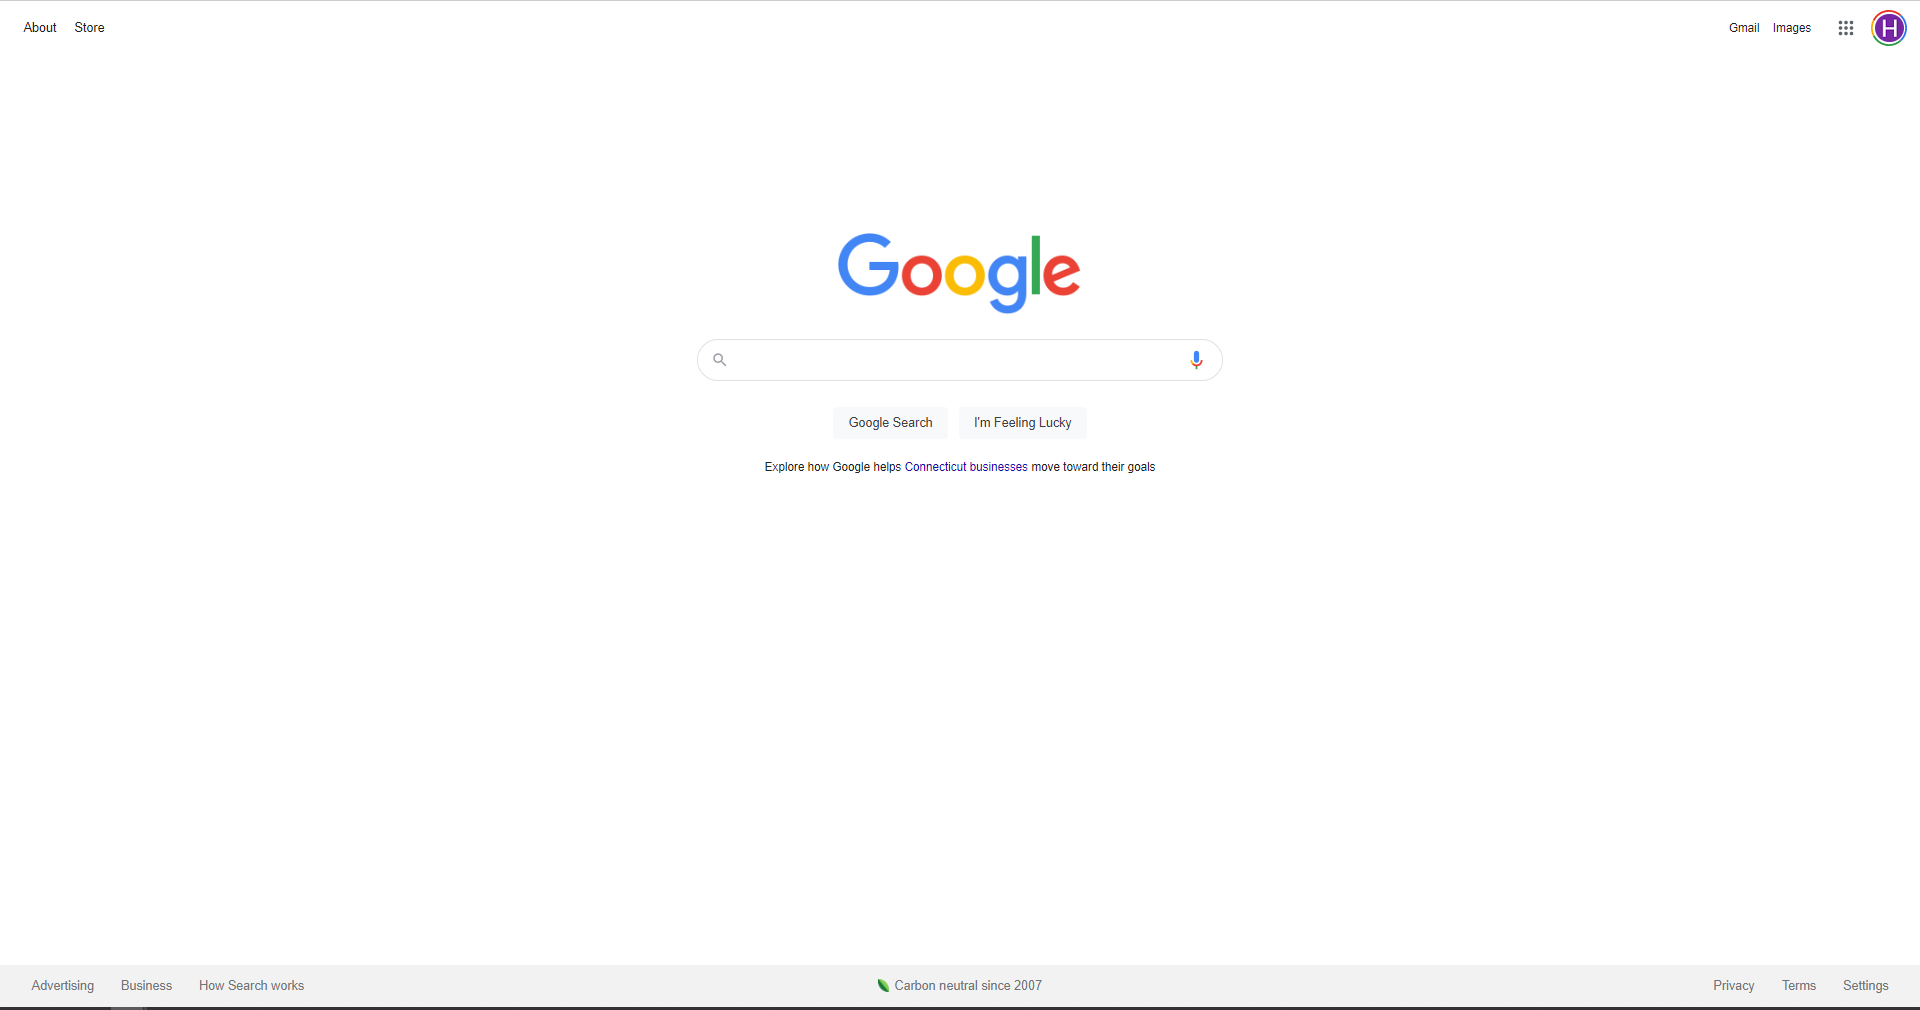


The `Google` logo up above.